## Time Series Prediction using LSTM

### Download Data
Link: https://datamarket.com/data/set/2324/daily-minimum-temperatures-in-melbourne-australia-1981-1990#!ds=2324&display=line

#### Description
Daily minimum temperatures in Melbourne, Australia, 1981-1990

Units: Degrees Celcius

#### Steps before loading
- Rename the column name with temprature values to "Temprature"
- In the last, there is one extra row in the data, remove it by opening the file and save it again.
- There are some values in Temprature column which have a "?" before them, they will give error, remove "?" before them and save the file
- If you don't want to do these steps, just load the data file given by Great Learning.

#### Mount google drive

In [0]:
import os

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
os.chdir("/content/drive/My Drive/LSTM-SequencitalNlp/internalassigment")

In [5]:
!ls -lrth

total 65K
-rw------- 1 root root  55K Dec 22 09:56 daily-minimum-temperatures-in-me-1.csv
-rw------- 1 root root 9.1K Dec 22 09:57 time_series_prediction_lstm_melbourne_daily_temprature_data_questions.ipynb


In [15]:
tempDF.head()

,Date,Temperature
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


#### Change your present working directory

In [0]:
os.chdir("/content/drive/My Drive/LSTM-SequencitalNlp/internalassigment")

In [0]:
import pandas as pd

### Load your data file

In [0]:
tempDF=pd.read_csv("daily-minimum-temperatures-in-me-1.csv")

#### Plot data

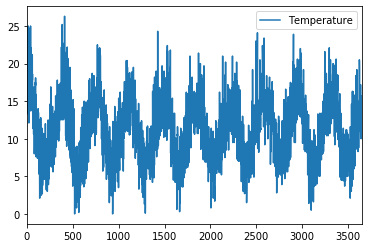

In [8]:
tempDF.plot()

#### Descibe your dataframe

In [9]:
tempDF.describe()

,Temperature
count,3650.000000
mean,11.177753
std,4.071837
min,0.000000
25%,8.300000
50%,11.000000
75%,14.000000
max,26.300000


#### Check for null values

In [10]:
tempDF.isnull().sum()

Date           0
Temperature    0
dtype: int64

#### Drop null values

In [0]:
#Looks like no null values 

#### Get the representation of the distribution of data in the form of histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f422094feb8>]],
      dtype=object)

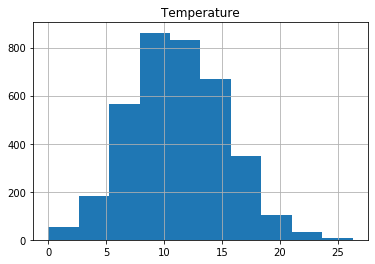

In [11]:
tempDF.hist()

In [0]:
import numpy as np

#### Check the maximum and minimum values

In [14]:
#Check Data Range
print('Min', np.min(tempDF))
print('Max', np.max(tempDF))

Min Date           1981-01-01
Temperature             0
dtype: object
Max Date           1990-12-31
Temperature          26.3
dtype: object


### Normalize the data

In [0]:
tempDF.drop("Date", axis=1, inplace=True)

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(tempDF)

#### Check the maximum and minimum values of scaled data

In [20]:
print('Min', np.min(scaled))
print('Max', np.max(scaled))

Min 0.0
Max 1.0


In [21]:
#70% examples will used for training (in the begining)
train_size = int(len(scaled) * 0.70)

#30% will be used for Test
test_size = len(scaled - train_size)

#Split the data
train, test = scaled[0:train_size, :], scaled[train_size: len(scaled), :]
print('train: {}\ntest: {}'.format(len(train), len(test)))

train: 2555
test: 1095


#### Look into some of the scaled values

In [23]:
scaled[0:15]

array([[0.78707224],
       [0.68060837],
       [0.7148289 ],
       [0.55513308],
       [0.60076046],
       [0.60076046],
       [0.60076046],
       [0.66159696],
       [0.82889734],
       [0.76045627],
       [0.61596958],
       [0.50570342],
       [0.63498099],
       [0.81749049],
       [0.95057034]])

### Split data into Training and Testing

In [0]:
already done up 

#### Print train and test size

In [27]:
print("number of records in train " ,train.shape[0])

number of records in train  2555


In [28]:
print("number of records in test " ,train.shape[0])

number of records in test  2555


## Create the sequential data
Map the temprature at a particular time t to the temprature at time t+n, where n is any number you define.

For example: to map tempratures of consecutive days, use t+1, i.e. loop_back = 1

#### Define your function to create dataset

In [0]:
#window - how long the sequence will be
def create_dataset(dataset, window=1):
    
    dataX, dataY = [], []
    
    for i in range(len(dataset)-window):
        
        a = dataset[i:(i+window), 0]        
        dataX.append(a)
        dataY.append(dataset[i + window, 0])
    
    return np.array(dataX), np.array(dataY)

#### Use function to get training and test set

In [0]:
window_size = 1
X_train, y_train = create_dataset(train, window_size)
X_test, y_test = create_dataset(test, window_size)

#### Transform the prepared train and test input data into the expected structure using numpy.reshape()

In [31]:
#Make it 3 Dimensional Data - needed for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_train.shape)
print(X_test.shape)

(2554, 1, 1)
(1094, 1, 1)


## Define Model

### Define sequntial model, add LSTM layer and compile the model

In [32]:
import tensorflow as tf

In [33]:
tf.keras.backend.clear_session()
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(32, input_shape=(window_size, 1)))
model.add(tf.keras.layers.Dense(1))
model.compile(optimizer='adam', loss='mse')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 2554 samples, validate on 1094 samples
Epoch 1/200
2554/2554 [==============================] - 1s 433us/sample - loss: 0.1140 - val_loss: 0.0431
Epoch 2/200
2554/2554 [==============================] - 0s 102us/sample - loss: 0.0199 - val_loss: 0.0143
Epoch 3/200
2554/2554 [==============================] - 0s 103us/sample - loss: 0.0149 - val_loss: 0.0133
Epoch 4/200
2554/2554 [==============================] - 0s 104us/sample - loss: 0.0140 - val_loss: 0.0124
Epoch 5/200
2554/2554 [==============================] - 0s 99us/sample - loss: 0.0131 - val_loss: 0.0117
Epoch 6/200
2554/2554 [==============================] - 0s 106us/sample - loss: 0.0123 - val_loss: 0.0108
Epoch 7/200
2554/2554 [==============================] - 0s 105us/sample - loss: 0.0116 - val_loss: 0.0100
Epoch 8/200
2554/2554 [==============================] - 0s 108us/sample - loss: 0.0110 - val_loss: 0.0095
Epo

KeyboardInterrupt: ignored

### Summarize your model

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 32)                4352      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________


### Train the model

In [36]:
model.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test), batch_size=32)

Train on 2554 samples, validate on 1094 samples
Epoch 1/200
2554/2554 [==============================] - 0s 107us/sample - loss: 0.0100 - val_loss: 0.0087
Epoch 2/200
2554/2554 [==============================] - 0s 106us/sample - loss: 0.0100 - val_loss: 0.0087
Epoch 3/200
2554/2554 [==============================] - 0s 106us/sample - loss: 0.0101 - val_loss: 0.0086
Epoch 4/200
2554/2554 [==============================] - 0s 108us/sample - loss: 0.0100 - val_loss: 0.0087
Epoch 5/200
2554/2554 [==============================] - 0s 109us/sample - loss: 0.0100 - val_loss: 0.0089
Epoch 6/200
2554/2554 [==============================] - 0s 105us/sample - loss: 0.0100 - val_loss: 0.0086
Epoch 7/200
2554/2554 [==============================] - 0s 108us/sample - loss: 0.0100 - val_loss: 0.0088
Epoch 8/200
2554/2554 [==============================] - 0s 105us/sample - loss: 0.0100 - val_loss: 0.0086
Epoch 9/200
2554/2554 [==============================] - 0s 104us/sample - loss: 0.0100 - val_lo

## Make Predictions and Evaluate your model

In [0]:
#Get prediction for both Training and Test Data
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

## Plot the results

In [0]:
#Un-normalize the predited data
trainPredict = scaler.inverse_transform(trainPredict)
testPredict = scaler.inverse_transform(testPredict)

In [0]:
import matplotlib.pyplot as plt

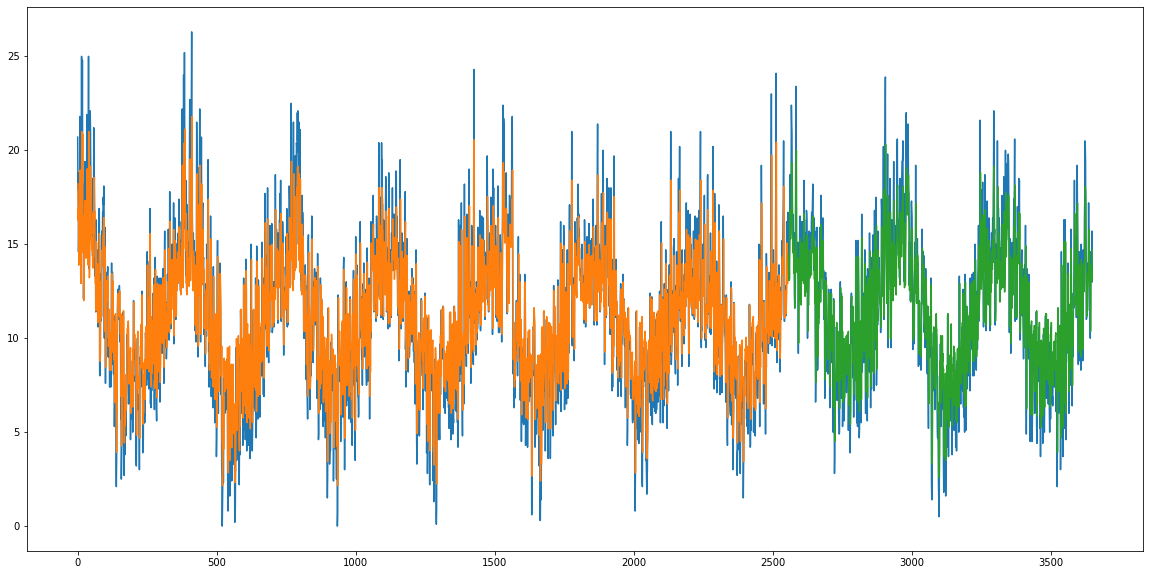

In [40]:
trainPredictPlot = np.empty_like(scaled)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[window_size:len(trainPredict)+window_size, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(scaled)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(window_size*2):len(scaled), :] = testPredict
# plot baseline and predictions
plt.figure(figsize=(20,10))
plt.plot(scaler.inverse_transform(scaled))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()